# Homework 12
## Anggara Putra Pratama - 1101174240

Reference Name : Muhammad Kemal Hernandi  1101174169

In [6]:
from tensorflow.keras.applications import InceptionV3, ResNet50, InceptionResNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import keras

In [13]:
train_dir = 'cat_dataset/train'
val_dir = 'cat_dataset/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

label = list(train_generator.class_indices.keys())
print(label)

Found 1680 images belonging to 12 classes.
Found 720 images belonging to 12 classes.
['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']


In [8]:
base_model = InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
)

base_model.summary()

base_model.trainable = False

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
block35_10_mixed (Concatenate)  (None, 25, 25, 128)  0           activation_269[0][0]             
                                                                 activation_271[0][0]             
                                                                 activation_274[0][0]             
__________________________________________________________________________________________________
block35_10_conv (Conv2D)        (None, 25, 25, 320)  41280       block35_10_mixed[0][0]           
__________________________________________________________________________________________________
block35_10 (Lambda)             (None, 25, 25, 320)  0           block35_9_ac[0][0]               
                                                                 block35_10_conv[0][0]            
__________________________________________________________________________________________________
block35_10

                                                                 activation_354[0][0]             
__________________________________________________________________________________________________
block17_19_conv (Conv2D)        (None, 12, 12, 1088) 418880      block17_19_mixed[0][0]           
__________________________________________________________________________________________________
block17_19 (Lambda)             (None, 12, 12, 1088) 0           block17_18_ac[0][0]              
                                                                 block17_19_conv[0][0]            
__________________________________________________________________________________________________
block17_19_ac (Activation)      (None, 12, 12, 1088) 0           block17_19[0][0]                 
__________________________________________________________________________________________________
conv2d_356 (Conv2D)             (None, 12, 12, 128)  139264      block17_19_ac[0][0]              
__________

In [9]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'), 
    Dense(64, activation='relu'),
    # Dropout(0.3),
    #Dropout(0.3), kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.00001)
    Dense(12, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                98368     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 12)                780       
Total params: 54,440,044
Trainable params: 103,308
Non-trainable params: 54,336,736
_________________________________________________________________


In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['accuracy']
)

training = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=16,
)

Epoch 1/16
53/53 [==============================] - 638s 10s/step - loss: 1.9585 - accuracy: 0.3269 - val_loss: 1.0455 - val_accuracy: 0.6069
Epoch 2/16
53/53 [==============================] - 494s 9s/step - loss: 0.9339 - accuracy: 0.6857 - val_loss: 0.8703 - val_accuracy: 0.7000
Epoch 3/16
53/53 [==============================] - 516s 10s/step - loss: 0.7406 - accuracy: 0.7265 - val_loss: 0.7121 - val_accuracy: 0.7583
Epoch 4/16
53/53 [==============================] - 504s 10s/step - loss: 0.6599 - accuracy: 0.7525 - val_loss: 0.6537 - val_accuracy: 0.7583
Epoch 5/16
53/53 [==============================] - 548s 10s/step - loss: 0.6287 - accuracy: 0.7765 - val_loss: 0.6376 - val_accuracy: 0.7639
Epoch 6/16
53/53 [==============================] - 573s 11s/step - loss: 0.6291 - accuracy: 0.7758 - val_loss: 0.6649 - val_accuracy: 0.7500
Epoch 7/16
53/53 [==============================] - 589s 11s/step - loss: 0.6403 - accuracy: 0.7858 - val_loss: 0.6217 - val_accuracy: 0.7694
Epoch 8

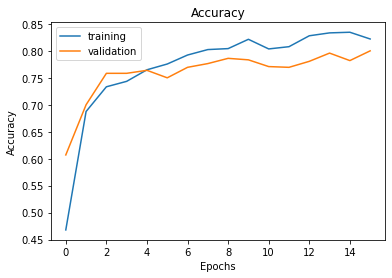

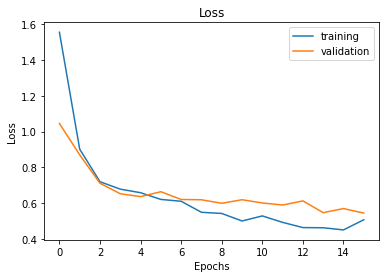

In [11]:
train_acc = training.history['accuracy']
train_loss = training.history['loss']
val_acc = training.history['val_accuracy']
val_loss = training.history['val_loss']

plt.figure()
plt.title('Accuracy')
plt.plot(train_acc, label='training')
plt.plot(val_acc, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
plt.title('Loss')
plt.plot(train_loss, label='training')
plt.plot(val_loss, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()